In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [5]:
boston = datasets.load_boston()
names = boston.feature_names
target = boston.target

bos = pd.DataFrame(boston.data)
bos.columns = names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
###PCA
##
#
#
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
X = bos.iloc[:,0:13]
X_reduced = pca.fit_transform(scale(X))
len(X_reduced)


506

In [42]:
#Variance 
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 47.1 ,  58.12,  67.67,  74.27,  80.69,  85.76,  89.91,  92.96,
        95.09,  96.78,  98.21,  99.51, 100.  ])

In [43]:
#cross validation
from sklearn import cross_validation
n = len(X_reduced)
kf_10 = cross_validation.KFold(n,n_folds=10,shuffle=True,random_state=2)
kf_10

sklearn.cross_validation.KFold(n=506, n_folds=10, shuffle=True, random_state=2)

In [44]:
#linear regression
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [45]:
##MSE
mse = []
y = target
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
mse.append(score)

C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

In [54]:
import matplotlib.pyplot as plt
for i in np.arange(1,13):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8,9,10,12,13], mse[1:13], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,15))

C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\jcarpent\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

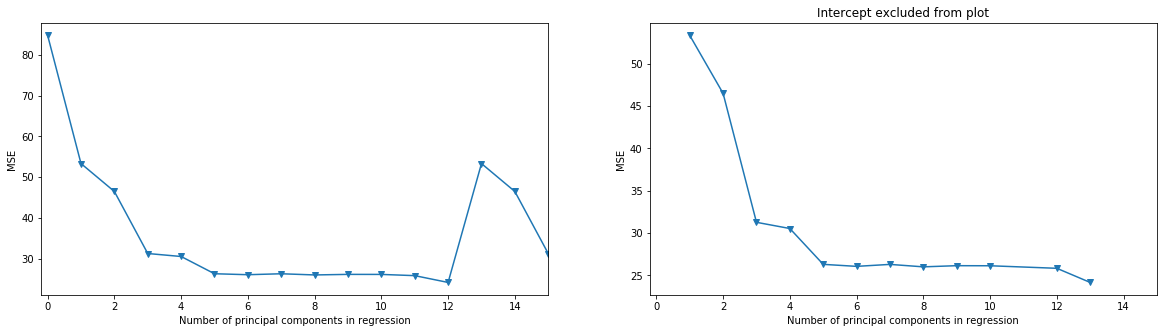

In [55]:
plt.show()